In [1]:
import numpy as np
import pandas as pd

### Загружаем выборку

In [2]:
data_frame = pd.read_csv('drive/MyDrive/heart.csv', delimiter = ',')
data_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Определяем пропуски в выборке

In [3]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Список долей отсутствующих записей (процентная статистика) 

In [4]:
for col in data_frame:
    missing = np.mean(data_frame[col].isnull())
    k = round(missing * 100)
    print('{} - {}%'.format(col, k))

age - 0%
sex - 0%
cp - 0%
trestbps - 0%
chol - 0%
fbs - 0%
restecg - 0%
thalach - 0%
exang - 0%
oldpeak - 0%
slope - 0%
ca - 0%
thal - 0%
target - 0%


### Данная выборка не имеет пропуски по двум причинам:
### 1. Показатели являются дискретными
### 2. Показатели являются и непрерывными
### Таким образом, в данной выборке удалять ничего не нужно.

### Выборка имеет следующий вид

In [5]:
data_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Определяем выбросы в показателе 'age', для этого построим график "ящик с усами"

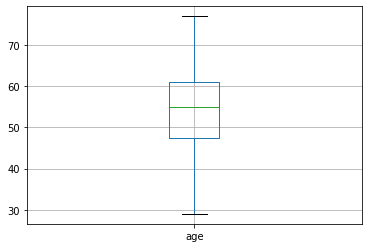

In [6]:
data_frame.boxplot(column = ['age']);

### На графике можно наблюдать, что выбросы в показателе отсутствуют, соответственно удалять ничего не нужно

### Определяем выбросы в показателе 'trestbps', для этого построим график "ящик с усами"

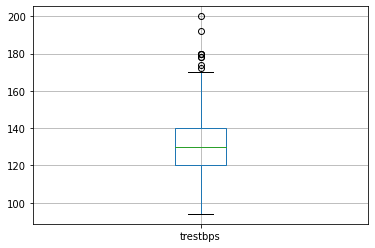

In [7]:
data_frame.boxplot(column = ['trestbps']);

### На графике можно наблюдать выбросы, которые находятся выше значения 170, в связи с этим эти данные будут удалены

### Производим удаление выбросов

In [8]:
data_frame.drop(data_frame[data_frame['trestbps'] >= 170].index, inplace = True) # Удаление верхних выбросов

### Показатель 'trestbps' после удаления выбросов. На графике можно наблюдать, что выбросов в показателе больше нет

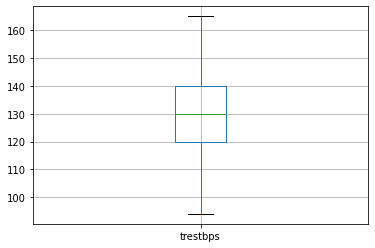

In [9]:
data_frame.boxplot(column = ['trestbps']);

### Определяем выбросы в показателе 'chol', для этого построим график "ящик с усами"

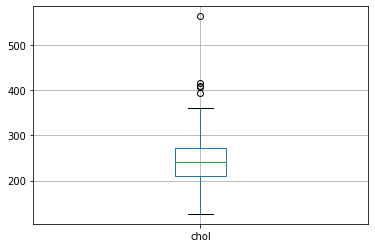

In [10]:
data_frame.boxplot(column = ['chol']);

### На графике можно наблюдать выбросы, которые находятся выше значения 360, в связи с этим эти данные будут удалены

### Производим удаление выбросов

In [11]:
data_frame.drop(data_frame[data_frame['chol'] >= 360].index, inplace = True) # Удаление верхних выбросов
#data_frame.drop(data_frame[data_frame['chol'] < 140].index, inplace = True) # Удаление верхних выбросов

### Показатель 'chol' после удаления выбросов. На графике можно наблюдать, что выбросов в показателе больше нет

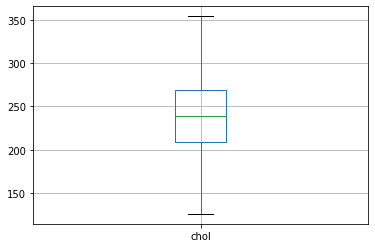

In [12]:
data_frame.boxplot(column = ['chol']);

### Определяем выбросы в показателе 'thalach', для этого построим график "ящик с усами"

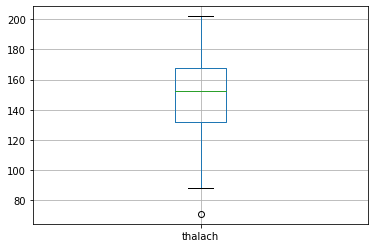

In [13]:
data_frame.boxplot(column = ['thalach']);

### На графике можно наблюдать выбросы, которые находятся ниже значения 90, в связи с этим эти данные будут удалены

### Производим удаление выбросов

In [14]:
data_frame.drop(data_frame[data_frame['thalach'] <= 90].index, inplace = True) # Удаление нижних выбросов

### Показатель 'thalach' после удаления выбросов. На графике можно наблюдать, что выбросов в показателе больше нет

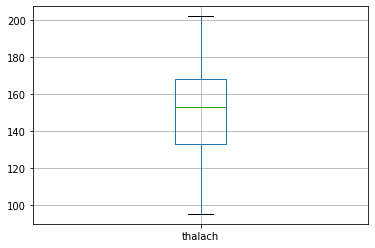

In [15]:
data_frame.boxplot(column = ['thalach']);

### Определяем выбросы в показателе 'oldpeak', для этого построим график "ящик с усами"

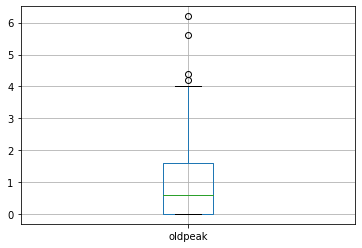

In [16]:
data_frame.boxplot(column = ['oldpeak']);

### Производим удаление выбросов

In [17]:
data_frame.drop(data_frame[data_frame['oldpeak'] > 4].index, inplace = True) # Удаление верхних выбросов

### Показатель 'oldpeak' после удаления выбросов. На графике можно наблюдать, что выбросов в показателе больше нет

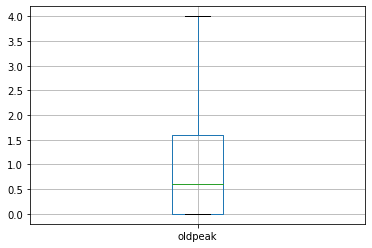

In [18]:
data_frame.boxplot(column = ['oldpeak']);

In [19]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,53.837545,0.700361,0.985560,129.021661,241.422383,0.137184,0.534296,150.480144,0.314079,0.936462,1.440433,0.707581,2.296029,0.566787
std,9.212800,0.458929,1.021405,14.450800,44.139994,0.344664,0.514021,22.360934,0.464988,1.021050,0.596691,1.005986,0.601103,0.496416
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,354.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [20]:
data_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
DF = data_frame.drop_duplicates(subset = ['age', 'sex',	'cp',	'trestbps',	'chol',	'fbs', 'restecg', 'thalach',
                                          'exang',	'oldpeak',	'slope', 'ca',	'thal', 'target'], keep = False)
DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Можно наблюдать что ранее у нас было 303 записей, после определения дубликов и их удаления выборка имеет 275 записей

### Приведем данные к одному формату от 0 до 1

In [22]:
from sklearn import preprocessing

In [23]:
x = DF.iloc[:,0:13]
y = DF['target']

normalized = preprocessing.normalize(x)

print(normalized)

[[0.19745405 0.00313419 0.00940257 ... 0.         0.         0.00313419]
 [0.10874818 0.00293914 0.00587828 ... 0.         0.         0.00587828]
 [0.1368249  0.         0.00333719 ... 0.00667439 0.         0.00667439]
 ...
 [0.23671899 0.00348116 0.         ... 0.00348116 0.00696232 0.01044348]
 [0.25352009 0.00444772 0.         ... 0.00444772 0.00444772 0.01334316]
 [0.1749685  0.         0.00306962 ... 0.00306962 0.00306962 0.00613925]]


### Рассчитаем коэффициенты корреляции для каждого входного показателя и выхода 

In [24]:
import scipy.stats as sts

### Показатель 'age'

In [25]:
print('Мода:')
print(DF['age'].mode())
print('Медиана =', DF['age'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['age'].mean())))

Мода:
0    58
dtype: int64
Медиана = 54.0
Среднее значение = 53.95


### Показатель 'sex'

In [26]:
print('Мода:', DF['sex'].mode())
print('Медиана =', DF['sex'].median())
print('Среднее значение =', DF['sex'].mean())

Мода: 0    1
dtype: int64
Медиана = 1.0
Среднее значение = 0.6981818181818182


### Показатель 'cp'

In [27]:
print('Мода:', DF['cp'].mode())
print('Медиана =', DF['cp'].median())
print('Среднее значение =', DF['cp'].mean())

Мода: 0    0
dtype: int64
Медиана = 1.0
Среднее значение = 0.9781818181818182


### Показатель 'trestbps'

In [28]:
print('Мода:', DF['trestbps'].mode())
print('Медиана =', DF['trestbps'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['trestbps'].mean())))

Мода: 0    120
1    130
dtype: int64
Медиана = 130.0
Среднее значение = 128.96


### Показатель 'chol'

In [29]:
print('Мода:', DF['chol'].mode())
print('Медиана =', DF['chol'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['chol'].mean())))

Мода: 0    197
1    204
2    234
dtype: int64
Медиана = 239.0
Среднее значение = 241.91


### Показатель 'thalach'

In [30]:
print('Мода:', DF['thalach'].mode())
print('Медиана =', DF['thalach'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['thalach'].mean())))

Мода: 0    162
dtype: int64
Медиана = 153.0
Среднее значение = 150.32


### Показатель 'oldpeak'

In [31]:
print('Мода:', DF['oldpeak'].mode())
print('Медиана =', float('{:.2f}'.format(DF['oldpeak'].median())))
print('Среднее значение =', float('{:.2f}'.format(DF['oldpeak'].mean())))

Мода: 0    0.0
dtype: float64
Медиана = 0.6
Среднее значение = 0.94


### Показатель 'slope'

In [32]:
print('Мода:', DF['slope'].mode())
print('Медиана =', DF['slope'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['slope'].mean())))

Мода: 0    2
dtype: int64
Медиана = 1.0
Среднее значение = 1.44


### Показатель 'thal'

In [33]:
print('Мода:', DF['thal'].mode())
print('Медиана =', DF['thal'].median())
print('Среднее значение =', float('{:.2f}'.format(DF['thal'].mean())))

Мода: 0    2
dtype: int64
Медиана = 2.0
Среднее значение = 2.3


### Построим тепловую карту

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

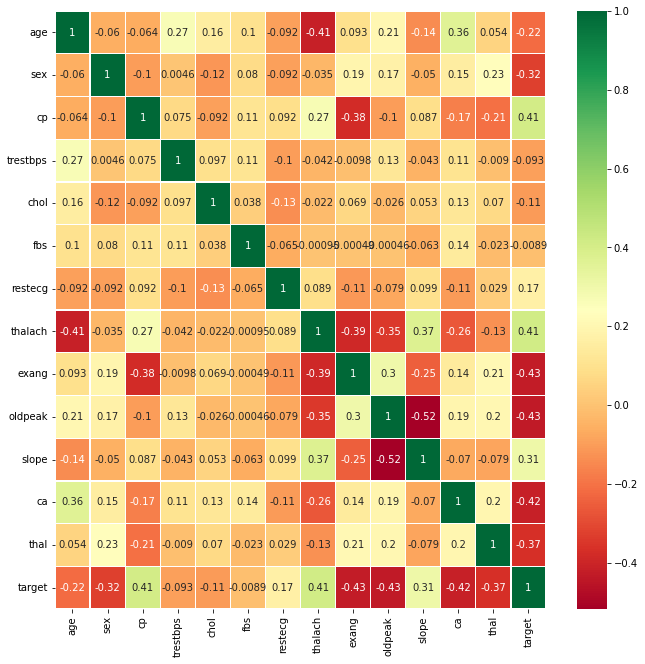

In [35]:
sns.heatmap(DF.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
# data.corr() --> создает матрицу корреляции, используется для получения текущего значения
fig = plt.gcf()
# Устанавливаем размер диаграммы
fig.set_size_inches(11, 11)
plt.show()

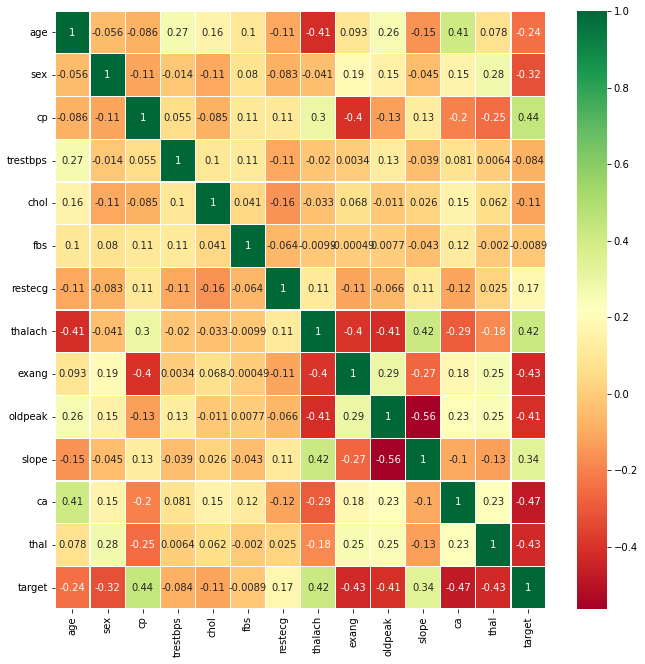

In [36]:
sns.heatmap(DF.corr(method="spearman"), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
# data.corr() --> создает матрицу корреляции, используется для получения текущего значения
fig = plt.gcf()
# Устанавливаем размер диаграммы
fig.set_size_inches(11, 11)
plt.show()

### Показатели 'oldpeak' и 'slope' нужно сравнить. В результате взаимная корреляция между двумя показателями равна -0,56, так-как это входные показатели следует оценить корреляцию между ними и выходом.
### Показатель 'oldpeak' и выход дает корреляцию -0,41, а показатель 'slope' и выход дает корреляцию 0,34. Таким образом, корреляцию между показателем 'oldpeak' и выходом меньше. Его необходимо оставить. Отсюда следует, что удалить нужно тот показатель корреляция с выходом которого больше. Это означает,что будет удален показатель 'slope'.

### Используя метод "feature selection", отобразить информативные показатели 

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# Применим класс SelectKBest, чтобы извлечь лучшие показатели
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(x,y) 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# Объединим два фрейма данных для лучшей визуализации
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(11,'Score'))

       Specs       Score
7    thalach  156.393469
11        ca   65.334942
9    oldpeak   55.877497
2         cp   49.767838
8      exang   34.160935
4       chol   24.516327
0        age   20.674615
1        sex    8.656362
10     slope    6.621835
12      thal    5.874515
3   trestbps    3.891595


### Так-как значимость показателей "slope", "thal", "trestbps" низкая, то удаляем их из выборки полностью.
### Однако былы построены тепловые карты с корреляционными методома Пирсона и Спирмена. В результате была выявлена незначительная разница в коэффицентах кореляции в показателях классов. 


In [39]:
df_new = DF[['age', 'sex',	'cp',	'chol',	'fbs', 'restecg', 'thalach', 'exang',	'oldpeak', 'ca']]
df_new

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,ca
0,63,1,3,233,1,0,150,0,2.3,0
1,37,1,2,250,0,1,187,0,3.5,0
2,41,0,1,204,0,0,172,0,1.4,0
3,56,1,1,236,0,1,178,0,0.8,0
4,57,0,0,354,0,1,163,1,0.6,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,123,1,0.2,0
299,45,1,3,264,0,1,132,0,1.2,0
300,68,1,0,193,1,1,141,0,3.4,2
301,57,1,0,131,0,1,115,1,1.2,1


### Приведем данные к одному формату от 0 до 1

In [40]:
normalized = preprocessing.normalize(df_new)
print(normalized)

[[0.2216685  0.00351855 0.01055564 ... 0.         0.00809266 0.        ]
 [0.11767919 0.00318052 0.00636104 ... 0.         0.01113181 0.        ]
 [0.15186856 0.         0.00370411 ... 0.         0.00518576 0.        ]
 ...
 [0.27359686 0.00402348 0.         ... 0.         0.01367984 0.00804697]
 [0.31077353 0.00545217 0.         ... 0.00545217 0.0065426  0.00545217]
 [0.19082552 0.         0.00334782 ... 0.         0.         0.00334782]]


### Данная выборка готова для анализирования данных

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [42]:
x = normalized
y = DF['target']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 275, dtype: int64


### Перемешиваем и разделяем тренировочные и тестовые наборы

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
global x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)
print(x_train)
print(y_train)
x_test.shape[0]

[[0.202282   0.0033161  0.         ... 0.0033161  0.01193795 0.0033161 ]
 [0.13669229 0.00297157 0.         ... 0.00297157 0.00534883 0.00594314]
 [0.2209566  0.         0.         ... 0.00401739 0.00803479 0.00401739]
 ...
 [0.22614342 0.00418784 0.         ... 0.00418784 0.         0.00418784]
 [0.1924805  0.00296124 0.00888372 ... 0.         0.00414573 0.00296124]
 [0.17517524 0.00302026 0.00302026 ... 0.         0.00543647 0.        ]]
211    0
285    0
289    0
65     1
192    0
      ..
108    1
180    0
264    0
222    0
172    0
Name: target, Length: 178, dtype: int64


97

### Словарь методов

In [45]:
m_dict = {1:'Случайный лес', 
          2:'Гаусс по частям', 
          3:'Беггинг ансамбль с методом случайный лес',
          4:'Бустинг ансамбль методом Adaboost', 
          5:'Бустинг ансамбль с методом Xgboost',
          6:'Стекинг ансамбль методом\nсредневзвешенного голосования',
          7:'Главные компоненты',
          8:'Кластеризация К-средних',
          9:'Подбор Гиперпараметров по сетке'
        }

### Матрица ошибок

In [46]:
def matrix(y_test, pred, m_dict, kindMethod):
  print("Количество неправильно соотнесенных классов из общего числа классов (%d) составила %d"
      % (x_test.shape[0], (y_test != pred).sum()))
  matrix = confusion_matrix(y_test, pred)
  plt.figure(figsize = (5.5, 4))
  plt.title("Матрица неточности для метода"f"\n{m_dict[kindMethod]}")
  sns.heatmap(pd.DataFrame(matrix), annot = True, cmap = 'Reds', fmt = 'g')

### Точность

In [47]:
def accuracy(y_test, pred, m_dict, kindMethod):
  # Доля правльных ответов алгоритма: Точность = (истинное положительное + истинно отрицательное значение) / всего 
  acc = accuracy_score(y_test, pred)
  print(f"Оценка точности для метода" f' "{m_dict[kindMethod]}" ' f"равна: {round(acc,3)*100}%") # Для дерева решений

  # Оценка f1: оценку F1 можно интерпретировать как средневзвешенное значение точности и запоминания, где оценка F1 достигает своего лучшего значения при 1 и худшего значения при 0
  f1 = f1_score(y_test, pred)
  print(f"Оценка f1 для метода" f' "{m_dict[kindMethod]}" ' f"равна: {round(f1,3)*100}%")

  # Долю объектов, названных классификатором положительными и при этом действительно являющимися положительными: если прогноз "да", как часто он оказывается правильным? Точность = истинно положительный / предсказанный да
  precision = precision_score(y_test, pred)
  print(f"Оценка точности для метода "f' "{m_dict[kindMethod]}" ' f"равна: {round(precision,3)*100}%")

  # Показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм: истинно положительный показатель (чувствительность): когда на самом деле да, как часто он дает предсказанное "да"? Истинно
  recall = recall_score(y_test, pred)
  print(f"Оценка отзыв для метода" f' "{m_dict[kindMethod]}" ' f"равна: {round(recall,3)*100}%")


### ROC-анализ

In [48]:
def roc(y_test, pred, m_dict, kindMethod):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  fpr, tpr, thresholds = roc_curve(y_test, pred)
  roc_auc = auc(fpr, tpr)

  p_conc = "В результате ROC-анализа была вычислена площадь ROC-кривой, ее значение составило %.2f%%.\nТаким образом, можно сделать вывод, что данный метод можно использовать"
  n_conc = "В результате ROC-анализа была вычислена площадь ROC-кривой, ее значение составило %.2f%%.\nТаким образом, можно сделать вывод, что данный метод можно использовать"

  plt.figure(figsize = (5, 5))
  lw = 2
  plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)'% roc_auc)
  plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-анализ для метода\n'f'{m_dict[kindMethod]}')
  plt.legend(loc = "lower right")
  plt.show()
  print(n_conc % roc_auc if roc_auc < 85 else p_conc % roc_auc)

### Метод "Случайный лес"

In [49]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [50]:
def mRFClassifier(test, m_dict, kindMethod):
    clf = RandomForestClassifier(max_depth=10,
                                 n_estimators=15,
                                 max_features=5)
    clf.fit(x_train, y_train)
    pred = clf.predict(test)
    print("\nМетод "f'{m_dict[kindMethod]}')
    print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность')
    pred = clf.predict(x_test)
    accuracy(y_test, pred, m_dict, kindMethod)
    matrix(y_test, pred, m_dict, kindMethod)
    roc(y_test, pred, m_dict, kindMethod)

### Обучение классификатора метода "Гаусса по частям"

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
def mGNBClassifier(test, m_dict, kindMethod):
    clf = GaussianNB()
    clf = clf.fit(x_train, y_train)
    pred = clf.predict(test)
    print("\nМетод "f'{m_dict[kindMethod]}')
    print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность')
    pred = clf.predict(x_test) 
    accuracy(y_test, pred, m_dict, kindMethod)
    matrix(y_test, pred, m_dict, kindMethod)
    roc(y_test, pred, m_dict, kindMethod)

### Беггинг ансамбль с методом Случайный лес

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
def mBGGClassifier(test, m_dict, kindMethod):
    clf = BaggingClassifier(RandomForestClassifier(), 
                              max_samples = 0.2, 
                              max_features = 1)
    clf.fit(x_train, y_train)
    pred = clf.predict(test)
    print("\nМетод "f'{m_dict[kindMethod]}')
    print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность')
    pred = clf.predict(x_test)
    accuracy(y_test, pred, m_dict, kindMethod)
    matrix(y_test, pred, m_dict, kindMethod)
    roc(y_test, pred, m_dict, kindMethod)

### Ансамбли. Беггинг. Метод AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
def mADBClassifier(test, m_dict, kindMethod):
    clf = AdaBoostClassifier(n_estimators = 10, 
                               learning_rate = 1)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print("\nМетод\n"f'{m_dict[kindMethod]}')
    print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность') 
    pred = clf.predict(x_test)
    accuracy(y_test, pred, m_dict, kindMethod)
    matrix(y_test, pred, m_dict, kindMethod)
    roc(y_test, pred, m_dict, kindMethod)

### Ансамбли. Градиентный бустинг. Xgboost

In [57]:
import xgboost

In [58]:
def mXGBClassifier(test, m_dict, kindMethod):
    clf = xgboost.XGBClassifier()
    clf.fit(x_train, y_train)
    pred = clf.predict(test)
    print("\nМетод "f'{m_dict[kindMethod]}')
    print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность') 
    pred = clf.predict(x_test)
    accuracy(y_test, pred, m_dict, kindMethod)
    matrix(y_test, pred, m_dict, kindMethod)
    roc(y_test, pred, m_dict, kindMethod)

### Ансамбли. Стекинг. Средневзвешенное голосование

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [60]:
global max_accuracy, method_label

In [61]:
def mVClassifier(test, m_dict, kindMethod):
  mRFC = RandomForestClassifier(max_depth=10,
                                n_estimators=15,
                                max_features=5)
  mGNBC = GaussianNB()
  mBGGC = BaggingClassifier(RandomForestClassifier(), 
                            max_samples = 0.2, 
                            max_features = 1)
  mADBC = AdaBoostClassifier(n_estimators = 10, 
                               learning_rate = 1)
  mXGBC = xgboost.XGBClassifier()
  VC = VotingClassifier(estimators = [('mRFC', mRFC), ('mGNBC', mGNBC), 
                                      ('mBGGC', mBGGC), ('mADBC', mADBC),
                                      ('mXGBC', mXGBC)], voting='hard')
  VC.fit(x_train, y_train)
  pred = VC.predict(test)
  print("\nМетод "f'{m_dict[kindMethod]}')
  print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
        else 'У пациента выявлена сердечная недостаточность') 
  pred = VC.predict(x_test)
  accuracy(y_test, pred, m_dict, kindMethod)
  matrix(y_test, pred, m_dict, kindMethod)
  roc(y_test, pred, m_dict, kindMethod)

  max_accuracy = 0
  method_label = ''
  for clf, label in zip([mRFC, mGNBC, mBGGC, mADBC, mXGBC],
                        ['RandomForestClassifier', 'GaussianNBClassifier', 'VotingClassifier',
                         'BaggingClassifier', 'AdaboostClassifier']):
    scores = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
    if scores.mean() > max_accuracy:
      max_accuracy = scores.mean()
      method_label = label
    print("Точность: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
  print("В результате работы метода средневзвешенного голосования была определена точность каждого метода.\nСамой высокой точностью обладает метод " f'{method_label}'", его точность составила %.2f%%" % max_accuracy)

### Матричные разложения. Инкрементный метод главных компонент

In [62]:
from sklearn.decomposition import IncrementalPCA
from scipy import sparse

In [63]:
def IPCA(test, m_dict, kindMethod):
  clf = IncrementalPCA(n_components=2, batch_size=200)
  IncrementalPCA(batch_size=200, n_components=2)
  x_sparse = sparse.csr_matrix(x)
  x_clf = clf.fit_transform(x_sparse)
  print("Результат работы метода", f'{m_dict[kindMethod]}', x_clf.shape)

### Кластеризация. Алгоритм К-средних

In [64]:
from sklearn.metrics import pairwise_distances
from sklearn import datasets 
from pandas import DataFrame
from sklearn.cluster import KMeans

In [65]:
def mKMS(test, m_dict, kindMethod): 
  clf = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2)
  clf = clf.fit(x)
  pred = clf.predict(test)
  print("\nМетод "f'{m_dict[kindMethod]}')
  print('У пациента не выявлена сердечная недостаточность' if (pred == 0).all()
          else 'У пациента выявлена сердечная недостаточность')
  pred = clf.fit_predict(x)
  #accuracy(x_test, pred, m_dict, kindMethod)
  #matrix(x_test, pred, m_dict, kindMethod)
  #roc(x_test, pred, m_dict, kindMethod)
  df_with_clf = df_new.copy()
  df_with_clf['cluster'] = pred
  df_with_clf['target'] = DF['target']
  print('Количество совпадений:', 
        len(df_with_clf[(df_with_clf['target'] == df_with_clf['cluster'])]))

  return df_with_clf

In [66]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from time import time

In [67]:
!pip install pydash
import pydash
from pydash import at

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
def mGSCV(test, m_dict, kindMethod): 
  clf = BaggingClassifier()
 
  base_estimator = [RandomForestClassifier(), GaussianNB(), AdaBoostClassifier()]
  max_samples = [0.3, 0.6]
  max_features = [0.5, 0.7]
  hyperparameter_grid = {'base_estimator': base_estimator,
                         'max_samples': max_samples,
                         'max_features': max_features}

  n_iter_search = 10
  
  grid_search = GridSearchCV(estimator = clf,
                             param_grid = hyperparameter_grid,
                             cv = 4, scoring = 'accuracy', verbose = 1,
                             return_train_score = True)
  start = time()
  best = grid_search.fit(x_train, y_train)
  best_pred = best.predict(x_test)

  model_best = BaggingClassifier(grid_search.best_estimator_)
  print("BaggingClassifier took %.2f seconds for %d candidates"
        " parameter settings." % ((time() - start), n_iter_search))
  means = grid_search.cv_results_['mean_test_score']
  stds = grid_search.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

  print("The best parameter for BaggingClassifier") 
  params_for_method = at(grid_search.best_params_, 'base_estimator', 'max_samples', 'max_features')
  print(params_for_method)

  clf_best = BaggingClassifier(RandomForestClassifier(), max_samples = 0.7, max_features = 0.6)
  clf_best = clf_best.fit(x_train, y_train)
  pred_best = clf_best.predict(test)
  print("\nМетод "f'{m_dict[kindMethod]}')
  print('У пациента не выявлена сердечная недостаточность' if (pred_best == 0).all()
        else 'У пациента выявлена сердечная недостаточность') 
  pred_best = clf_best.predict(x_test)
  accuracy(y_test, pred_best, m_dict, kindMethod)
  matrix(y_test, pred_best, m_dict, kindMethod)
  roc(y_test, pred_best, m_dict, kindMethod)

### Функция ввода тестовых данных

In [69]:
def data_test():
  age = int(input('Введите возраст: '))
  sex = int(input('Выберите пол:\n0. Мужской\n1. Женский\n'))
  while sex < 0 or sex > 1:
      print('Некорректный ввод! Попробуйте ввести снова!')
      sex = int(input('Выберите пол:\n0. Мужской\n1. Женский\n'))
  cp = int(input('Введите уровень церебрального паралича: ')) # 0..3
  while cp < 0 or sex > 3:
      print('Некорректный ввод! Попробуйте ввести снова!')
      cp = int(input('Введите уровень церебрального паралича: '))
  chol = int(input('Введите уровень холестерина: ')) # 126..354
  fbs = int(input('Введите уровень сахара в крови : ')) # 0..1
  while fbs < 0 or fbs > 1:
      print('Некорректный ввод! Попробуйте ввести снова!')
      fbs = int(input('Введите уровень сахара в крови : '))
  restecg = int(input('Введите уровень электрокардиограммы покоя: ')) # 0..2
  while restecg < 0 or restecg > 2:
      print('Некорректный ввод! Попробуйте ввести снова!')
      restecg = int(input('Введите уровень электрокардиограммы покоя: '))
  thalach = int(input('Введите уровень талаха: ')) # 95..202
  exang = int(input('Введите уровень обмена медицинской информацией : ')) # 0..1
  while exang < 0 or exang > 1:
      print('Некорректный ввод! Попробуйте ввести снова!')
      exang = int(input('Введите уровень обмена медицинской информацией : ')) 
  oldpeak = float(input('Введите запись истории пиков : ')) # 0.0..6.2
  ca = int(input('Введите стадию рака: ')) # 0..4
  while ca < 0 or ca > 1:
      print('Некорректный ввод! Попробуйте ввести снова!')
      ca = int(input('Введите стадию рака: '))
  test = [[age, sex, cp,	chol,	fbs, restecg, thalach, exang,	oldpeak, ca]]
  return test

### Меню программы

In [ ]:
methods = {1: mRFClassifier,
           2: mGNBClassifier,
           3: mBGGClassifier,
           4: mADBClassifier,
           5: mXGBClassifier,
           6: mVClassifier,
           7: IPCA,
           8: mKMS,
           9: mGSCV
           } # Создаем словарь для выбора метода

print('Выбери один из 9 методов для классификации: ')
for key, value in m_dict.items():
    print(key, ''.join(str(x) for x in value))

kindMethod = int(input('Введите номер метода: '))

while kindMethod < 1 or kindMethod > 9:
    print('Некорректный ввод номера! Попробуйте ввести номер: ')
    kindMethod = int(input('Введите номер метода: '))
age, sex, cp,	chol,	fbs, restecg, thalach, exang,	oldpeak, ca = [27, 1, 1, 171, 0, 1, 110, 0, 5.2, 1]
test = [[age, sex, cp,	chol,	fbs, restecg, thalach, exang,	oldpeak, ca]]
methods[kindMethod](test, m_dict, kindMethod)
#methods[kindMethod](data_test(), m_dict, kindMethod)

Выбери один из 9 методов для классификации: 
1 Случайный лес
2 Гаусс по частям
3 Беггинг ансамбль с методом случайный лес
4 Бустинг ансамбль методом Adaboost
5 Бустинг ансамбль с методом Xgboost
6 Стекинг ансамбль методом
средневзвешенного голосования
7 Главные компоненты
8 Кластеризация К-средних
9 Подбор Гиперпараметров по сетке
